In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/compresive_strength_concrete.csv")

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
data[data.duplicated() == True]

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [ ]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
data.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":'Cement',
                               "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":'Blast_Furnace_Slag',
                               "Fly Ash (component 3)(kg in a m^3 mixture)":'Fly_Ash', "Water  (component 4)(kg in a m^3 mixture)": 'Water',
                               "Superplasticizer (component 5)(kg in a m^3 mixture)":'Superplasticizer',
                                "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":'Coarse-Aggregate',
                               "Fine Aggregate (component 7)(kg in a m^3 mixture)": 'Fine_Aggregate',
                                "Age (day)": "Age_day",
                        "Concrete_target ": 'Concrete_target'
                                
                               }, inplace=True )
                         
                   

In [ ]:
data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day,"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
blast_mean = np.mean(data.Blast_Furnace_Slag)
fly_mean = np.mean(data.Fly_Ash)
superplastic_mean = np.mean(data.Superplasticizer)

In [ ]:
data.Blast_Furnace_Slag=data.Blast_Furnace_Slag.mask(data.Blast_Furnace_Slag==0).fillna(blast_mean)

In [ ]:
data.Fly_Ash=data.Fly_Ash.mask(data.Fly_Ash==0).fillna(fly_mean)

In [ ]:
data.Superplasticizer=data.Superplasticizer.mask(data.Superplasticizer==0).fillna(superplastic_mean)

In [ ]:
data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day,"Concrete compressive strength(MPa, megapascals)"
0,540.0,73.895825,54.18835,162.0,2.50000,1040.0,676.0,28,79.99
1,540.0,73.895825,54.18835,162.0,2.50000,1055.0,676.0,28,61.89
2,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,270,40.27
3,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,365,41.05
4,198.6,132.400000,54.18835,192.0,6.20466,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.30000,179.6,8.90000,870.1,768.3,28,44.28
1026,322.2,73.895825,115.60000,196.0,10.40000,817.9,813.4,28,31.18
1027,148.5,139.400000,108.60000,192.7,6.10000,892.4,780.0,28,23.70
1028,159.1,186.700000,54.18835,175.6,11.30000,989.6,788.9,28,32.77


In [ ]:
y = data['Concrete compressive strength(MPa, megapascals) ']

In [ ]:
x = data.drop(columns='Concrete compressive strength(MPa, megapascals) ')

In [ ]:
x

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day
0,540.0,73.895825,54.18835,162.0,2.50000,1040.0,676.0,28
1,540.0,73.895825,54.18835,162.0,2.50000,1055.0,676.0,28
2,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,270
3,332.5,142.500000,54.18835,228.0,6.20466,932.0,594.0,365
4,198.6,132.400000,54.18835,192.0,6.20466,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.30000,179.6,8.90000,870.1,768.3,28
1026,322.2,73.895825,115.60000,196.0,10.40000,817.9,813.4,28
1027,148.5,139.400000,108.60000,192.7,6.10000,892.4,780.0,28
1028,159.1,186.700000,54.18835,175.6,11.30000,989.6,788.9,28


In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day
196,194.7,73.895825,100.50000,165.6,7.50000,1006.4,905.9,28
631,325.0,73.895825,54.18835,184.0,6.20466,1063.0,783.0,7
81,318.8,212.500000,54.18835,155.7,14.30000,852.1,880.4,3
526,359.0,19.000000,141.00000,154.0,10.90000,942.0,801.0,3
830,162.0,190.000000,148.00000,179.0,19.00000,838.0,741.0,28
...,...,...,...,...,...,...,...,...
87,286.3,200.900000,54.18835,144.7,11.20000,1004.6,803.7,3
330,246.8,73.895825,125.10000,143.3,12.00000,1086.8,800.9,14
466,190.3,73.895825,125.20000,166.6,9.90000,1079.0,798.9,100
121,475.0,118.800000,54.18835,181.1,8.90000,852.1,781.5,28


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [ ]:
X_train.shape

(576, 8)

In [ ]:
X_val.shape

(145, 8)

In [ ]:
X_test.shape

(309, 8)

In [ ]:
#Normalization of Data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train -= mean
X_train /= std

X_test -= mean
X_test /= std


X_val -= mean
X_val /= std

In [ ]:
X_train.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day
387,2.152538,-0.560948,-0.716821,-0.358539,-0.758270,-1.309523,0.435915,-0.310775
560,-0.583943,0.583250,-0.716821,0.150525,-0.518103,1.035095,-0.317474,-0.310775
942,0.262061,0.548911,-0.716821,-0.192022,-0.088922,-1.345009,0.671737,-0.310775
563,-0.676318,3.219595,-0.716821,0.150525,-0.518103,0.046554,-1.000117,-0.630701
282,-0.304076,-0.560948,0.890531,0.283739,-0.471406,0.697977,-0.151158,0.115793


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


In [ ]:
network = Sequential()

In [ ]:
network.add(layers.Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(4, activation='relu'))
network.add(layers.Dense(1))

In [ ]:
network.compile(optimizer='adam', loss='mse', metrics='mae')

In [ ]:
history = network.fit(X_train, Y_train, batch_size=30, verbose=0, epochs=100, validation_data=(X_val, Y_val))

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 101)

In [ ]:
print('Training Loss: ' + str(train_loss[-1]))
print('*'*20)
print('Validation Loss' + str(val_loss[-1]))


Training Loss: 145.1216583251953
********************
Validation Loss141.4490966796875


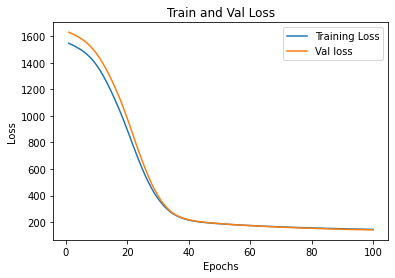

In [ ]:
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.title('Train and Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
mae_train = history.history['mae']
mae_val= history.history['val_mae']

In [ ]:
print('Training Loss: ' + str(mae_train[-1]))
print('*'*20)
print('Validation Loss' + str(mae_val[-1]))


Training Loss: 9.790096282958984
********************
Validation Loss9.537922859191895


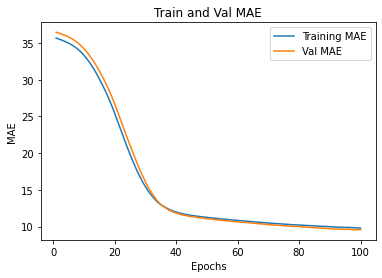

In [ ]:
plt.plot(epochs, mae_train, label='Training MAE')
plt.plot(epochs, mae_val, label='Val MAE')
plt.title('Train and Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
prediction = network.predict(X_test)

In [ ]:
network.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 1ms/step - loss: 143.9457 - mae: 9.8887


[143.94569396972656, 9.888731956481934]

In [ ]:
prediction.shape

(309, 1)

In [ ]:
prediction=prediction.reshape(309)

In [ ]:
output = pd.DataFrame({'Actual': Y_test})

In [ ]:
output['prediction'] = prediction

In [ ]:
output.reset_index(inplace=True)

In [ ]:
output['Absolute Error'] = np.abs(output['prediction'] - output['Actual'])

In [ ]:
output

,index,Actual,prediction,Absolute Error
0,31,52.91,53.262112,0.352112
1,109,55.90,49.330509,6.569491
2,136,74.50,60.420841,14.079159
3,88,35.30,48.904449,13.604449
4,918,10.54,27.346203,16.806203
...,...,...,...,...
304,250,24.92,20.045137,4.874863
305,377,36.30,29.124674,7.175326
306,615,32.33,36.204117,3.874117
307,9,39.29,45.118797,5.828797
